In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import spatial as spa
import scipy.linalg as linalg

In [2]:
X = np.genfromtxt("dataset.csv", delimiter = ",", skip_header=1)
N = X.shape[0]

In [3]:
threshold = 1.25

In [4]:
distances = spa.distance_matrix(X, X)

In [5]:
B = np.zeros((N, N))
B[distances <= threshold] = 1
np.fill_diagonal(B, 0)

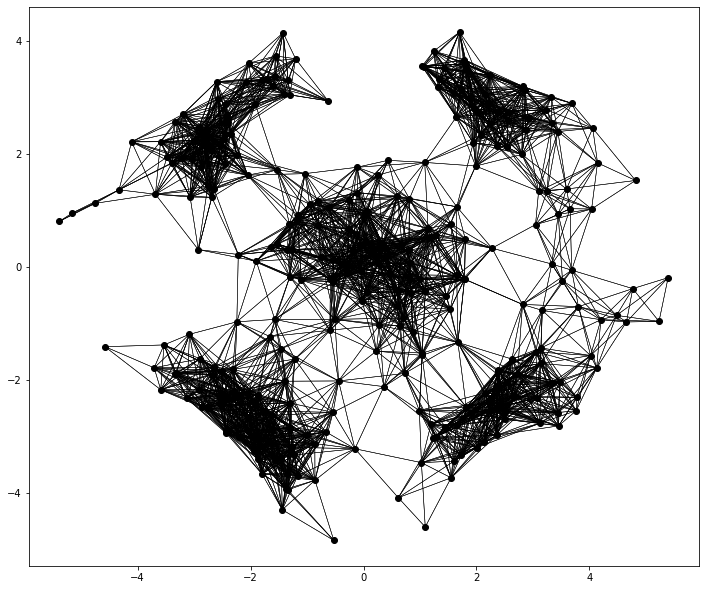

In [6]:
plt.figure(figsize = (12,12))
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(X[:,0], X[:,1], "ko")
for i in range(N):
    for j in np.nonzero(B[i])[0]:
        plt.plot([X[i,0], X[j,0]], [X[i,1], X[j,1]], "k", lw = 0.5)

plt.show()

In [7]:
D = np.zeros((N, N))

for i in range(N):
    D[i][i] = sum(B[i] > 0)
    
L = D - B

for i in range(D.shape[0]):
    D[i][i] = D[i][i]**(-1/2)

In [8]:
laplacian = np.eye(N) - np.matmul(np.matmul(D, B), D)

In [9]:
values, vectors = linalg.eig(laplacian)
values = np.real(values)
vectors = np.real(vectors)

R = 5
Z = vectors[:,values.argsort()[0:R]]

In [10]:
def update_centroids(memberships, Z):
    if memberships is None:
        # initialize centroids
        centroids = Z[(84, 128, 166,186,269),:]
    else:
        # update centroids
        centroids = np.vstack([np.mean(Z[memberships == k,], axis = 0) for k in range(K)])
    return centroids

def update_memberships(centroids, Z):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, Z)
    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)
    return memberships

In [11]:
K = 5
centroids = None
memberships = None
iteration = 1
while True:
    print("iteration: ",iteration)
    old_centroids = centroids
    centroids = update_centroids(memberships, Z)
    if np.alltrue(centroids == old_centroids):
        break

    old_memberships = memberships
    memberships = update_memberships(centroids, Z)
    if np.alltrue(memberships == old_memberships):
        break
    iteration += 1

iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14


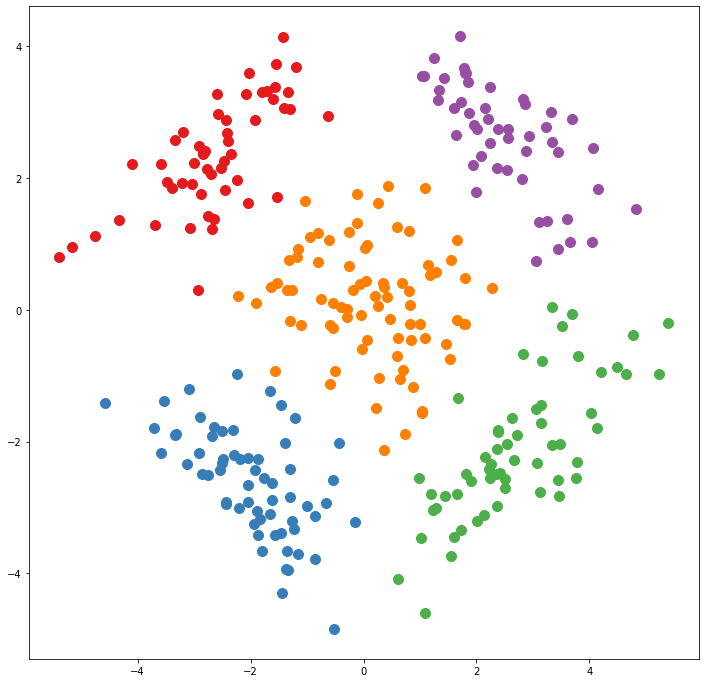

In [12]:
plt.figure(figsize=(12,12))
cluster_colors = np.array(["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00"])
for c in range(K):
    plt.plot(X[memberships == c, 0], X[memberships == c, 1], "o", markersize = 10,
             color = cluster_colors[c])
plt.show()